<a href="https://colab.research.google.com/github/proditor002/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1.   ข้อมูลโจทย์ อยู่ใน ตัวแปร Data
2.   ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3.   ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4.   เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5.   เขียน comments อธิบายทุกขั้นตอน
6.   อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist
7.   commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)


In [15]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
import pandas as pd

In [16]:
Name = 'ทอฝัน พงษ์พิเดช'
ID = '6230210483'

In [17]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [18]:
Data = DataGenerator(Name,ID)

021:22:12


In [19]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-8.590591,-3.384560,6.182718,-10.013727,-3.798767,-10.386514,-4.951959,4.412683,-4.209981,2.053323,-9.436627,7.189614,-7.128790,-6.411139,-1.171090,8.044543,4.895843,9.009631,5.613588,-2.318265,-2.903407,3.881669,-6.769120,21.408343
1,-1.780529,-4.050530,5.651998,-2.922966,-5.314078,-3.230391,4.816577,-4.308441,-5.471005,7.333923,1.486305,4.574943,8.483905,-3.641024,2.156536,-7.497718,8.401389,5.533454,2.371273,-5.433469,9.923802,-8.043338,-8.101059,-38.216691
2,-1.317042,-5.234922,5.785962,-2.759441,-4.191934,-1.691788,4.471417,-6.076208,-6.237195,7.449835,1.632279,4.951774,9.081778,-6.340779,1.470355,-5.382698,9.529785,6.343260,4.176402,-5.876628,9.225844,-9.399084,-10.469844,-44.995422
3,-2.890972,7.835401,8.801621,5.784255,1.195772,-6.683487,-4.455486,-4.591505,-2.522932,-0.802568,1.440209,-7.198531,5.487459,5.718287,5.860904,-3.967740,3.116904,3.084671,-2.715012,-1.836151,8.548597,0.524378,15.670803,4.621891
4,0.696475,-5.034636,5.928600,-5.211910,-6.003475,-1.638056,2.014188,-5.219334,-4.721540,8.374975,-0.454258,5.993044,7.062063,-4.993895,-0.792897,-6.587069,7.754338,5.317533,2.988931,-5.168134,9.749888,-9.344624,-10.069272,-44.723122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.578964,-3.595504,5.054173,-9.940088,-7.124007,-8.085441,-2.769145,2.588654,-5.477224,-0.194023,-8.711575,9.566052,-5.875453,-8.826926,-0.212664,6.717171,4.442475,8.913906,3.078284,-2.253711,-0.051820,3.362835,-7.191008,18.814176
9996,-6.233917,6.662471,8.533216,6.878110,0.480179,-5.905370,-5.053298,-3.598717,-3.335469,-1.148128,2.537946,-4.728113,5.028287,2.578534,8.117830,-4.211865,3.209944,4.391970,-2.225402,0.004109,5.442513,3.070636,13.324941,17.353181
9997,9.641212,-5.273755,-5.130493,6.274294,-4.651740,3.422169,8.745878,-7.716951,5.570299,-10.243794,-0.618124,-2.897298,4.748631,4.693753,-8.963484,-6.874213,1.495819,3.947954,-7.892559,1.745546,-5.095021,-0.374443,-10.547509,0.127783
9998,-1.583269,3.391245,-3.536525,2.780576,-0.937440,-7.751907,9.043572,-2.629062,-7.243474,-9.298432,-0.461757,-6.511084,4.468788,-7.858024,-10.332272,-7.718783,5.525522,3.399530,5.189234,7.473903,-6.619214,-0.209460,6.782490,0.952698


In [20]:
Data.shape # ดูขนาดของชุดข้อมูล

(10000, 24)

*************************************************
**ทำการตัดข้อมูลที่มีค่า correlation ที่ซ้ำกันออกไป**

In [21]:
corr = np.corrcoef(Data.to_numpy().T)

In [22]:
corr.shape # ดูขนาดของ corr

(24, 24)

In [23]:
corr

array([[ 1.        ,  0.14911094,  0.03266964,  0.18320093,  0.06517606,
         0.43818779, -0.02000149, -0.05451777,  0.23419011, -0.18661214,
        -0.03510231, -0.32496401, -0.08330082,  0.37136865, -0.01996483,
        -0.46460386, -0.32500807, -0.10949574, -0.23140988, -0.28760948,
        -0.37872802, -0.07320836,  0.14911094, -0.07320836],
       [ 0.14911094,  1.        ,  0.19428863,  0.05064928,  0.37842665,
        -0.09678552, -0.68926997,  0.61033302, -0.24541403,  0.14609097,
        -0.39663264, -0.33803924,  0.03679069, -0.07351972,  0.14751492,
        -0.38904241, -0.55174356, -0.0402635 , -0.30709536,  0.07700145,
        -0.16039503,  0.34906782,  1.        ,  0.34906782],
       [ 0.03266964,  0.19428863,  1.        , -0.24966878, -0.24186736,
        -0.50957457, -0.37633118,  0.28202027, -0.50874918,  0.37296143,
        -0.3568447 , -0.11127014, -0.2107758 , -0.06805245,  0.35355515,
        -0.22233773, -0.17689113,  0.4512118 ,  0.22946833, -0.54880941,
  

In [24]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')
# ทำการวนloopเพื่อหา correlation ที่มีค่าซ้ำกัน

row = 1 column = 22 corrcoef = 1.0
row = 22 column = 1 corrcoef = 1.0
row = 23 column = 21 corrcoef = 1.0


In [25]:
DataD = Data.iloc[:,1:21]
DataD

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-3.384560,6.182718,-10.013727,-3.798767,-10.386514,-4.951959,4.412683,-4.209981,2.053323,-9.436627,7.189614,-7.128790,-6.411139,-1.171090,8.044543,4.895843,9.009631,5.613588,-2.318265,-2.903407
1,-4.050530,5.651998,-2.922966,-5.314078,-3.230391,4.816577,-4.308441,-5.471005,7.333923,1.486305,4.574943,8.483905,-3.641024,2.156536,-7.497718,8.401389,5.533454,2.371273,-5.433469,9.923802
2,-5.234922,5.785962,-2.759441,-4.191934,-1.691788,4.471417,-6.076208,-6.237195,7.449835,1.632279,4.951774,9.081778,-6.340779,1.470355,-5.382698,9.529785,6.343260,4.176402,-5.876628,9.225844
3,7.835401,8.801621,5.784255,1.195772,-6.683487,-4.455486,-4.591505,-2.522932,-0.802568,1.440209,-7.198531,5.487459,5.718287,5.860904,-3.967740,3.116904,3.084671,-2.715012,-1.836151,8.548597
4,-5.034636,5.928600,-5.211910,-6.003475,-1.638056,2.014188,-5.219334,-4.721540,8.374975,-0.454258,5.993044,7.062063,-4.993895,-0.792897,-6.587069,7.754338,5.317533,2.988931,-5.168134,9.749888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-3.595504,5.054173,-9.940088,-7.124007,-8.085441,-2.769145,2.588654,-5.477224,-0.194023,-8.711575,9.566052,-5.875453,-8.826926,-0.212664,6.717171,4.442475,8.913906,3.078284,-2.253711,-0.051820
9996,6.662471,8.533216,6.878110,0.480179,-5.905370,-5.053298,-3.598717,-3.335469,-1.148128,2.537946,-4.728113,5.028287,2.578534,8.117830,-4.211865,3.209944,4.391970,-2.225402,0.004109,5.442513
9997,-5.273755,-5.130493,6.274294,-4.651740,3.422169,8.745878,-7.716951,5.570299,-10.243794,-0.618124,-2.897298,4.748631,4.693753,-8.963484,-6.874213,1.495819,3.947954,-7.892559,1.745546,-5.095021
9998,3.391245,-3.536525,2.780576,-0.937440,-7.751907,9.043572,-2.629062,-7.243474,-9.298432,-0.461757,-6.511084,4.468788,-7.858024,-10.332272,-7.718783,5.525522,3.399530,5.189234,7.473903,-6.619214


In [26]:
DataD.shape # ตรวจสอบขนาดของข้อมูลเพื่อดูว่าได้ขนาดของข้อมูลที่ต้องการหรือไม่

(10000, 20)

***************************************************
###**ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

In [27]:
from sklearn.cluster import KMeans   ##  import ก่อน
import matplotlib.pyplot as plt          
from sklearn.decomposition import PCA

In [28]:
kmeans = KMeans()  ## กำหนด define 
pca1 = PCA()

In [29]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
new_pca_1 = pca1.fit_transform(Data)

****************
ทำการคำนวน

In [31]:
kmeans.cluster_centers_    #เรียกดูค่า k-mean center ในแต่ละ cluster

array([[  7.94423083,   8.56508712,   2.28630291,  -7.23525539,
         -7.21557626,  -2.66850554,  -7.71060939,   0.29794056,
         -4.84496383,  -7.81540239,  -6.21354844,  -3.58516405,
          3.23095996,  -3.80907224,   0.43728255,  -3.31546442,
         -8.29629836,  -8.16181211,  -4.96739315,  -5.64913545,
         -8.76193184,   5.65144355,  17.13017424,  30.25721776],
       [  8.67564436,  -5.06314832,  -5.84249049,   6.26341946,
         -3.85818097,   3.46880709,   8.50185909,  -8.64212794,
          5.63203059,  -9.24459047,   0.20774119,  -1.21302004,
          3.88222027,   5.60761356,  -9.01636457,  -8.4878148 ,
          2.04851739,   4.1890685 ,  -6.99638936,   2.26570157,
         -6.98956012,  -0.78163035, -10.12629664,  -1.90815176],
       [ -0.58239652,   3.12631846,   4.50424444,   3.70121499,
         -2.54747781,  -6.67304728,   3.35791872,  -3.28442564,
         -4.61339016,  -6.38216525,   0.90534928,  -2.35335402,
          5.99767325,  -3.43830248,   

************
plot กราฟดูการกระจายของข้อมูล

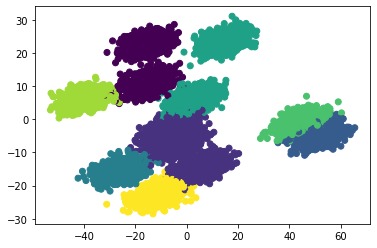

In [32]:
kmeans = KMeans()         
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca_1[:,0],new_pca_1[:,1],c=y)  

In [33]:
kmeans.cluster_centers_    #เรียกดูค่า k-mean center ในแต่ละ cluster

array([[ -3.07394167,   7.93312296,   2.29197927,   5.3359594 ,
          4.916637  ,  -1.28835474,  -3.98500823,   2.48162052,
         -2.84949666,   4.14007859,  -3.24022626,   1.52976379,
          5.56208118,  -2.30165461,   5.17871492,  -5.11440137,
          1.35502453,   1.67540087,  -5.049602  ,   2.26585438,
          7.75631889,   1.92452755,  15.86624592,  11.62263776],
       [  3.84414853,  -0.89884443,  -0.1879865 ,   4.08291987,
         -3.95933612,  -3.31753283,   7.51946135,  -4.70325283,
         -1.55572129,  -9.21140693,   0.67461686,  -0.87308754,
          5.28822539,  -3.05880831,  -3.9429447 ,  -7.71666349,
          1.8779383 ,   1.93350811,   0.56864503,   2.83519473,
         -3.91612713,  -0.05380084,  -1.79768886,   1.73099579],
       [ -2.09111292,  -3.83151098,  -8.77028705,   7.9108556 ,
          8.20522775,   9.00782402,   8.45880951,  -9.33811613,
          7.485428  ,  -9.1305753 ,   9.5862592 ,   5.12983432,
          7.94783024,   5.02310091,   

*********************
##**หาจำนวน cluster ที่เหมาะสมกับข้อมูลของเราด้วยวิธี Elbow Method**

In [34]:
SSE = list()        # สร้าง list ชื่อว่า SSE      ### เพื่อหาค่า Sum of Squared Errors
for k in [1,2,3,4,5,6,7,8]:    # วนลูปตัวแปร k ตั้งแต่ 1-8  
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [35]:
SSE #ค่า Sum of Squared Errors

[13879602.78433308,
 9122631.046205603,
 7422139.144649109,
 6063062.142322729,
 4836369.819693639,
 3974830.28557136,
 3151727.1785474457,
 2500806.4740088503]

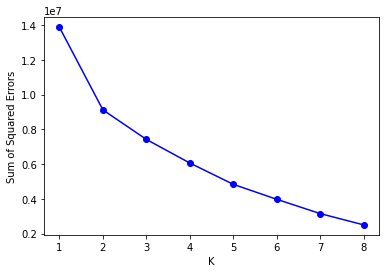

In [36]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')  # plot กราฟแสดงค่า Sum of Squared Errors
plt.xlabel('K')  ## กำหนดให้แกน X ชื่อ "K"
plt.ylabel('Sum of Squared Errors'); ## กำหนดให้แกน Y ชื่อ "Sum of Squared Errors"

In [37]:
kmeans.inertia_    ## ผลรวมของระยะทางกำลังสองของตัวอย่างไปยังศูนย์กลางคลัสเตอร์ที่ใกล้ที่สุด

2500806.4740088503

******************
ในที่นี้เลือก cluster = 2 กลุ่ม

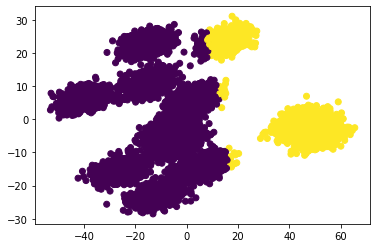

In [38]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca_1[:,0],new_pca_1[:,1],c=y) # plot กราฟดูการกระจายของ Data แต่มี cluster เป็น 2 กลุ่ม

In [39]:
kmeans.cluster_centers_      #เรียกดูค่า k-mean center ที่ได้กำหนด cluster ให้แล้ว

array([[  1.51685527,   1.53686127,   1.64847688,   0.93030831,
         -1.84277352,  -1.23434784,   1.15065226,  -1.75314916,
         -3.08915123,  -2.60207851,  -2.28691225,   0.23955858,
          1.81305301,  -2.92965993,   1.00453223,  -2.85816348,
          2.3718399 ,   0.79668915,  -0.42700973,  -1.06050079,
          0.66950281,   1.71861132,   3.07372253,  10.59305661],
       [  2.31565317,  -0.73185858,   0.31844973,   1.42947968,
          3.29344521,   3.5012183 ,   1.05843423,  -3.62885881,
          1.44597143,  -0.66134715,   3.07205862,   2.52268877,
          4.06892603,   1.90325221,   4.33624508,  -3.0322096 ,
          7.53428463,   0.72512832,   3.68785161,  -1.35086876,
          4.79842377,  -7.75711992,  -1.46371715, -36.78559962]])

*************
##**ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

In [40]:
from sklearn.cluster import KMeans   ## เริ่มทำการ import ก่อน
import matplotlib.pyplot as plt          
from sklearn.manifold import MDS

In [42]:
model = MDS(n_components=2)

In [43]:
out = model.fit_transform(Data)

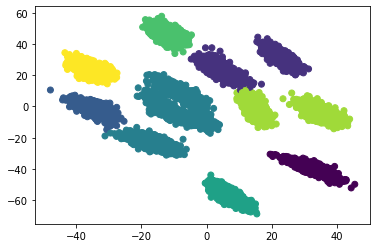

In [44]:
kmeans = KMeans()
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(out[:, 0], out[:, 1],c=y)  # plot กราฟดูการกระจายของ Data ที่ถูกลด Dimension

In [45]:
kmeans.cluster_centers_  #เรียกดูค่า k-mean center ในแต่ละ cluster

array([[ -0.05630468,  -4.51093986,   6.18115071,  -3.23394755,
         -6.1297986 ,  -3.15313104,   3.48856984,  -4.31643715,
         -4.68901677,   7.60724628,   0.7723274 ,   4.86297682,
          7.97664521,  -4.48651351,   0.68564772,  -7.38212887,
          9.20937633,   6.25044368,   3.01368977,  -5.96866837,
          9.42135444,  -9.32479672,  -9.02187972, -44.62398361],
       [ -3.07394167,   7.93312296,   2.29197927,   5.3359594 ,
          4.916637  ,  -1.28835474,  -3.98500823,   2.48162052,
         -2.84949666,   4.14007859,  -3.24022626,   1.52976379,
          5.56208118,  -2.30165461,   5.17871492,  -5.11440137,
          1.35502453,   1.67540087,  -5.049602  ,   2.26585438,
          7.75631889,   1.92452755,  15.86624592,  11.62263776],
       [  0.82731591,  -4.0749538 ,  -2.64127423,  -4.61762872,
         -8.14712059,   5.06119687,   4.62710997,  -9.91826015,
         -5.18444807,  -4.57275326,   5.81321246,   0.10692879,
         -0.71589968,  -4.71901389,   

*****
หาจำนวน cluster ที่เหมาะสมกับข้อมูลของเราด้วยวิธี Elbow Method

In [46]:
SSE = list()        # สร้าง list ชื่อว่า SSE      ### เพื่อหาค่า Sum of Squared Errors
for k in [1,2,3,4,5,6,7,8]:    # for loop ตัวแปร k ตั้งแต่ 1-8  
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [47]:
SSE #ค่า Sum of Squared Errors

[13879602.78433308,
 9122631.046205603,
 7422139.144649109,
 6063062.142322729,
 4836369.819693639,
 3974830.28557136,
 3151727.1785474457,
 2500806.4740088503]

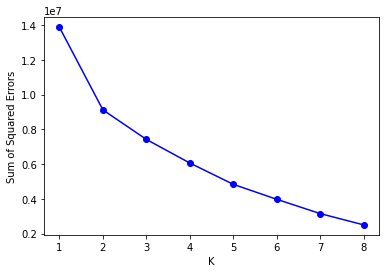

In [48]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')  # plot กราฟแสดงค่า Sum of Squared Errors
plt.xlabel('K')  ## กำหนดให้แกน X ชื่อ "K"
plt.ylabel('Sum of Squared Errors'); ## กำหนดให้แกน Y ชื่อ "Sum of Squared Errors"

In [50]:
kmeans.inertia_   ## ผลรวมของระยะทางกำลังสองของตัวอย่างไปยังศูนย์กลางคลัสเตอร์ที่ใกล้ที่สุด

2500806.4740088503

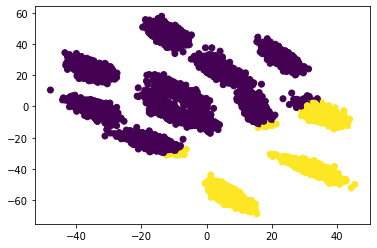

In [51]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(out[:,0],out[:,1],c=y) # plot กราฟดูการกระจายของ Data แต่มี cluster เป็น 2 กลุ่ม

In [52]:
kmeans.cluster_centers_    #เรียกดูค่า k-mean center ในแต่ละ cluster

array([[  1.51685527,   1.53686127,   1.64847688,   0.93030831,
         -1.84277352,  -1.23434784,   1.15065226,  -1.75314916,
         -3.08915123,  -2.60207851,  -2.28691225,   0.23955858,
          1.81305301,  -2.92965993,   1.00453223,  -2.85816348,
          2.3718399 ,   0.79668915,  -0.42700973,  -1.06050079,
          0.66950281,   1.71861132,   3.07372253,  10.59305661],
       [  2.31565317,  -0.73185858,   0.31844973,   1.42947968,
          3.29344521,   3.5012183 ,   1.05843423,  -3.62885881,
          1.44597143,  -0.66134715,   3.07205862,   2.52268877,
          4.06892603,   1.90325221,   4.33624508,  -3.0322096 ,
          7.53428463,   0.72512832,   3.68785161,  -1.35086876,
          4.79842377,  -7.75711992,  -1.46371715, -36.78559962]])

**************************
###**เปรียบเทียบความแตกต่าง**
กราฟการกระจายของข้อมูลที่ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

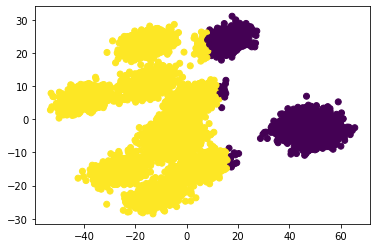

In [53]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca_1[:,0],new_pca_1[:,1],c=y) # plot กราฟดูการกระจายของ Data แต่มี cluster เป็น 2 กลุ่ม

กราฟการกระจายของข้อมูลที่ ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

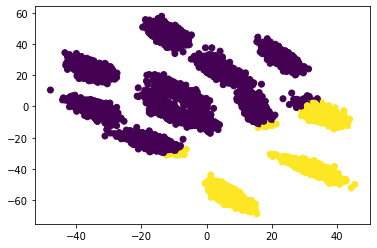

In [56]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(out[:,0],out[:,1],c=y)   # plot กราฟดูการกระจายของ Data ที่ถูกลด Dimension แต่มี cluster เป็น 2 กลุ่ม